# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [128]:
# Importamos las bibliotecas que utilizaremos en el resto del lab
import pandas as pd
import seaborn as sns
from scipy import stats

In [129]:
# Creamos un diccionario para, después, transformarlo fácilmente a un DataFrame
x_values = [17, 51, 27, 21, 36, 48, 19, 26, 54, 30]
y_values = [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]
diccionario_values = {'X': x_values, 'Y': y_values}

# Transformamos el diccionario a un DataFrame
student_data = pd.DataFrame(diccionario_values)

# Cambiamos el nombre de las columnas
student_data.columns = ['edad', 'retrasos']
student_data.head(4)

,edad,retrasos
0,17,10
1,51,1
2,27,5
3,21,9


Draw a dispersion diagram (scatter plot) for the data.

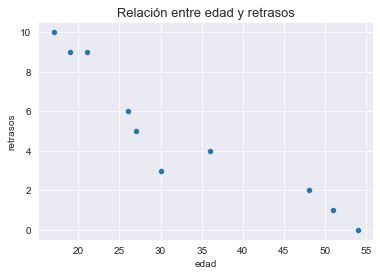

In [130]:
# Cambiemos primero el estilo de las gráficas para que se vean más cool
sns.set_style('darkgrid')

# Ahora sí grafiquemos la gráfica de dispersión
ax = sns.scatterplot(data=student_data, x="edad", y="retrasos")

# Agreguémosle un título a nuestra gráfica
ax.set_title('Relación entre edad y retrasos', fontsize=13);

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

**Respuesta**

- A simple vista, parece que hay una correlación negativa entre los retrasos y la edad, es decir, entre más grandes en edad son las personas, menos retrasos tienen. Por el contrario, entre más jóvenes, más tarde llegan a clase. 

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

**Respuesta**

La covarianza nos indica la relación linear que hay entre dos variables. En otras palabras, la covarianza nos indicaría si
- ambas aumentan o disminuyen de manera conjunta (covarianza positiva),
- una variable disminuye cuando la otra aumenta (covarianza negativa), o
- no hay relación entre las variables (covarianza cercana a cero).

La correlación es muy similar a la covarianza solo que, además de indicarnos la relación, nos indica _el grado de relación_ entre las variables. Una correlación nos diría, por ejemplo, no solo que ambas variables aumentan o disminuyen de manera conjunta, sino también _qué tanto_ lo hace una con respecto de la otra. En términos numéricos, una correlación puede ir de -1 a 1:
- -1: indica que siempre que una variable aumenta, la otra disminuye.
- 0: indica que no hay relación linear evidente entre las variables.
- 1: indica que ambas variables aumentan o disminuyen de manera conjunta. 

In [131]:
# Calculemos la covarianza redondeada a dos decimales
covarianza = student_data['edad'].cov(student_data['retrasos']).round(2)
print('Covarianza: ', covarianza)

# Calculemos la correlación redondeada a dos decimales
correlacion = student_data['edad'].corr(student_data['retrasos']).round(2)
print('Correlación: ', correlacion)

Covarianza:  -45.57
Correlación:  -0.94


    - La covarianza negativa nos indica que hay una relación negativa entra las variables.
    - La correlación nos indica que hay una relación negativa y que, además, la relación es muy fuerte (casi es de -1). Es decir, las variables se mueven casi en sincronía y de manera inversa.

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

**Respuesta** 
- Utilicemos la regresión más sencilla: la regresión lineal. 
- En este escenario, la variable dependiente —la que queremos predecir— serán los retrasos. (Típicamente, la variable _x_ es la independiente y la variable _y_ es la dependiente).  

In [133]:
# Construyamos una regresión lineal
regresion = stats.linregress(x=student_data.edad, y=student_data.retrasos)

# Ahora podemos extraer varios atributos de la regresión
print('Slope: ', regresion.slope.round(3))
print('Correlacion: ', regresion.rvalue.round(3))
print('Desviación estándar: ', regresion.stderr.round(3))

Slope:  -0.243
Correlacion:  -0.939
Desviación estándar:  0.031


Plot your regression model on your scatter plot.

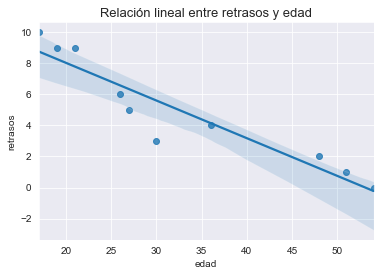

In [135]:
# Elaboremos una gráfica de dispersión que incluya la línea de regresión.
ax = sns.regplot(data=student_data, x='edad', y='retrasos', ci=95)
ax.set_title('Relación lineal entre retrasos y edad', fontsize=13);

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

**Respuesta:**

- r-cuadrada
- 

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [90]:
# Import any libraries you may need & the data
vehicles = pd.read_csv('vehicles.csv')

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

**Respuesta**
- Mi sospecha es que la variable que más predice emisiones de CO2 será Costo de Combustible por Año.

In [91]:
# Reduzcamos nuestro dataset solo a las variables relevantes. 
vehicles.columns

Index(['Make', 'Model', 'Year', 'Engine Displacement', 'Cylinders',
       'Transmission', 'Drivetrain', 'Vehicle Class', 'Fuel Type',
       'Fuel Barrels/Year', 'City MPG', 'Highway MPG', 'Combined MPG',
       'CO2 Emission Grams/Mile', 'Fuel Cost/Year'],
      dtype='object')

In [92]:
vehicles = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']]

In [116]:
# Para calcular la correlación, usaremos "corrwith", que nos permite comparar un DataFrame vs. una Serie.
# En contraste, "corr" es para comparar dos Series.
correlaciones = vehicles.loc[:, vehicles.columns != 'CO2 Emission Grams/Mile'].corrwith(vehicles['CO2 Emission Grams/Mile'])

# Ordenemos los valores
correlaciones.sort_values(ascending=False)

Fuel Barrels/Year    0.986189
Fuel Cost/Year       0.930865
Cylinders            0.752393
Year                -0.222300
Combined MPG        -0.926229
dtype: float64

- La predicción no estuvo tan mal. El costo de gasolina por año es el segundo mejor predictor de las emisiones de CO2 de un vehículo. Sin embargo, la variable más importante son los Fuel Barrels por año. 

- La variable que menos nos ayudaría para predecir las emisiones de CO2 sería el año del coche, pues su correlación es la más cercana a cero. (OJO: una correlación negativa no es equivalente a decir que la relación no es importante. Lo que importa es el valor de la correlación, no si es negativa o positiva). 

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [120]:
# Utilicemos nuevamenta una regresión lineal. 
v_regresion = stats.linregress(x=vehicles['Fuel Barrels/Year'], y=vehicles['CO2 Emission Grams/Mile'])
print('Slope: ', v_regresion.slope.round(3))
print('Correlacion: ', v_regresion.rvalue.round(3))
print('Desviación estándar: ', v_regresion.stderr.round(3))

Slope:  26.284
Correlacion:  0.986
Desviación estándar:  0.023


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [ ]:
# Your response here. 

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [152]:
# Contruyamos nuestro DataFrame
fiesta = pd.DataFrame({'invitados': [1, 3, 4, 6, 8, 9, 11, 14], 'asistentes': [1, 2, 4, 4, 5, 7, 8, 13]})
fiesta.head(4)

,invitados,asistentes
0,1,1
1,3,2
2,4,4
3,6,4


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

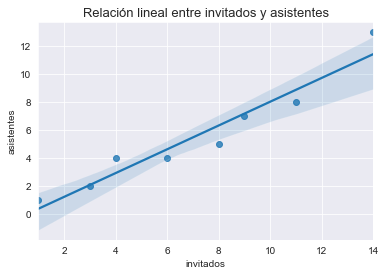

In [136]:
# Grafiquemos con una gráfica de dispersión con línea de regresión. 
ax = sns.regplot(data=fiesta, x='invitados', y='asistentes', ci=95)
ax.set_title('Relación lineal entre invitados y asistentes', fontsize=13);

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

**Respuesta**

- Parece que hay una correlación positiva entre los invitados y los asistentes

In [139]:
# Obtengamos algunos atributos del modelo de regresión.
fiesta_regresion = stats.linregress(x=fiesta.invitados, y=fiesta.asistentes)
print('Slope: ', fiesta_regresion.slope.round(3))
print('Correlacion: ', fiesta_regresion.rvalue.round(3))
print('Desviación estándar: ', fiesta_regresion.stderr.round(3))

Slope:  0.848
Correlacion:  0.965
Desviación estándar:  0.094


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

**Respuesta**

- Como se observa en la gráfica anterior, hay tres valores que no entran en nuestro intervalo de confianza del 95%. Excluyámoslos.

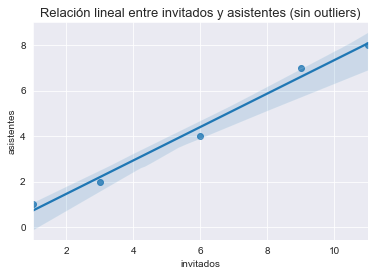

In [164]:
# Eliminar valores outliers
fiesta_filtrada = fiesta.loc[fiesta.invitados.isin([4, 8, 14]) == False, :]

# Grafiquemos
ax = sns.regplot(data=fiesta_filtrada, x='invitados', y='asistentes', ci=95)
ax.set_title('Relación lineal entre invitados y asistentes (sin outliers)', fontsize=13);

In [165]:
# Recalculemos los atributos de la regresión sin los outliers. 
fiesta_f_regresion = stats.linregress(x=fiesta_filtrada.invitados, y=fiesta_filtrada.asistentes)
print('Slope: ', fiesta_f_regresion.slope.round(3))
print('Correlacion: ', fiesta_f_regresion.rvalue.round(3))
print('Desviación estándar: ', fiesta_f_regresion.stderr.round(3))

Slope:  0.735
Correlacion:  0.994
Desviación estándar:  0.046


What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

**Respuesta**

- Naturalmente, la correlación es mayor una vez que eliminalos los outliers, los cuales, por definición, por valores que no siguen la tendencia general de los demás datos. 